In [1]:
from google.colab import files

# Subí tu archivo kaggle.json desde tu computadora
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itamayo","key":"135c67fad8c2e15bb8d8bb3c54dd2d59"}'}

In [2]:
# Crear carpeta y mover el archivo con permisos adecuados
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle


In [4]:
# Descargar el dataset Walmart Sales Forecast
!kaggle datasets download -d aslanahmedov/walmart-sales-forecast


Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast
License(s): copyright-authors


In [5]:
# Descomprimir el dataset descargado
!unzip walmart-sales-forecast.zip


Archive:  walmart-sales-forecast.zip
  inflating: features.csv            
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               


In [6]:
# Ver los archivos que se descargaron
import os

for filename in os.listdir():
    print(filename)


.config
train.csv
kaggle.json
walmart-sales-forecast.zip
stores.csv
test.csv
features.csv
sample_data


In [7]:
import pandas as pd

# Cargar los datasets
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
sales = pd.read_csv('train.csv')  # este es el archivo principal con las ventas

# Mostrar primeras filas para confirmar que se cargaron bien
print("📊 Features:")
display(features.head())

print("🏬 Stores:")
display(stores.head())

print("💵 Sales:")
display(sales.head())


📊 Features:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


🏬 Stores:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


💵 Sales:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")


In [9]:
print("🎯 Datos de ventas (train.csv):")
sales.info()

print("\n📋 Datos de tiendas (stores.csv):")
stores.info()

print("\n🛒 Datos de contexto (features.csv):")
features.info()


🎯 Datos de ventas (train.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB

📋 Datos de tiendas (stores.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB

🛒 Datos de contexto (features.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Da

In [10]:
# Unimos sales con stores
df = pd.merge(sales, stores, on="Store", how="left")

# Unimos el resultado con features
df = pd.merge(df, features, on=["Store", "Date", "IsHoliday"], how="left")

# Revisamos el resultado
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [11]:
# Convertimos la fecha
df["Date"] = pd.to_datetime(df["Date"])

# Creamos columnas derivadas
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


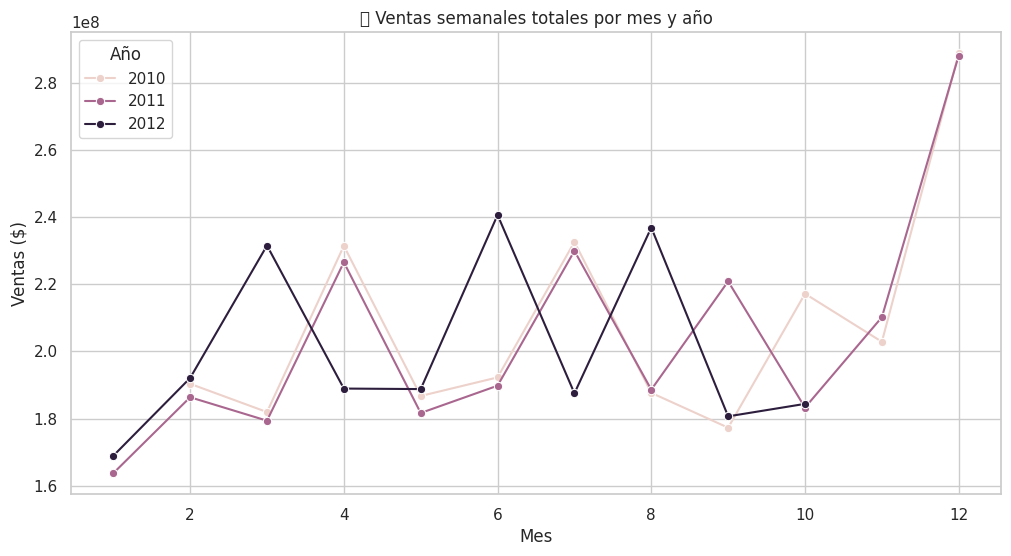

In [12]:
# Ventas totales por mes
monthly_sales = df.groupby(["Year", "Month"])["Weekly_Sales"].sum().reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="Month", y="Weekly_Sales", hue="Year", marker="o")
plt.title("📈 Ventas semanales totales por mes y año")
plt.ylabel("Ventas ($)")
plt.xlabel("Mes")
plt.legend(title="Año")
plt.show()


<ipython-input-13-a748169e1c50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x="IsHoliday", y="Weekly_Sales", palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


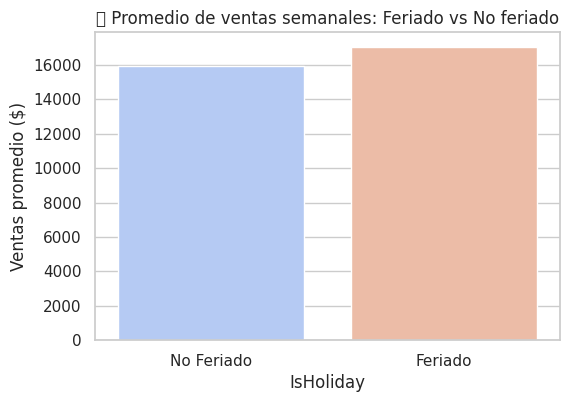

In [13]:
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=holiday_sales, x="IsHoliday", y="Weekly_Sales", palette="coolwarm")
plt.title("🎉 Promedio de ventas semanales: Feriado vs No feriado")
plt.ylabel("Ventas promedio ($)")
plt.xticks([0,1], ['No Feriado', 'Feriado'])
plt.show()


<ipython-input-14-f9a6596b9513>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_type, x="Type", y="Weekly_Sales", palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127980 (\N{DEPARTMENT STORE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


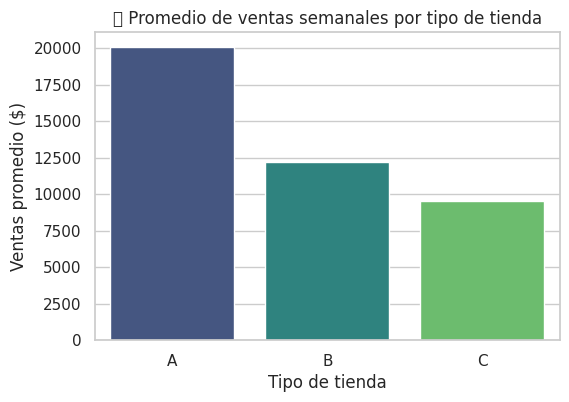

In [14]:
# Promedio de ventas por tipo de tienda
sales_by_type = df.groupby("Type")["Weekly_Sales"].mean().reset_index().sort_values(by="Weekly_Sales", ascending=False)

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=sales_by_type, x="Type", y="Weekly_Sales", palette="viridis")
plt.title("🏬 Promedio de ventas semanales por tipo de tienda")
plt.xlabel("Tipo de tienda")
plt.ylabel("Ventas promedio ($)")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


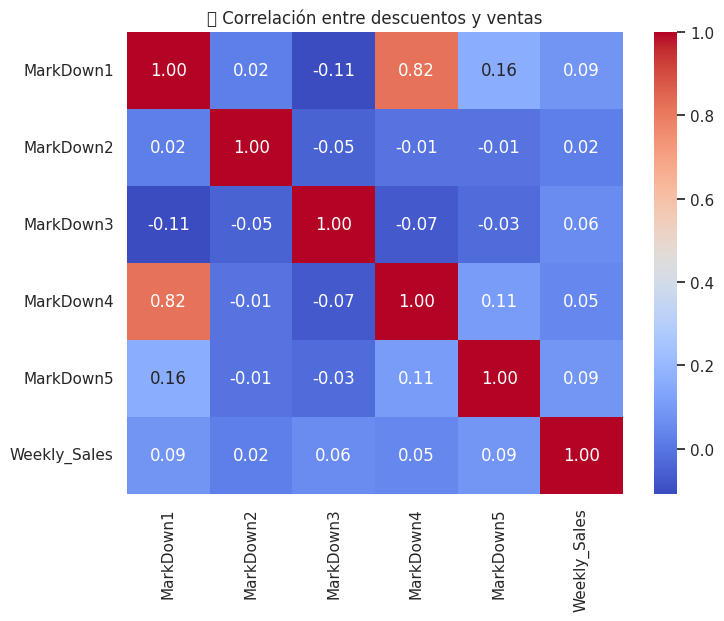

In [15]:
# Seleccionamos solo columnas relevantes
cols_to_check = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Weekly_Sales"]

# Correlación entre descuentos y ventas
correlation = df[cols_to_check].corr()

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔥 Correlación entre descuentos y ventas")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


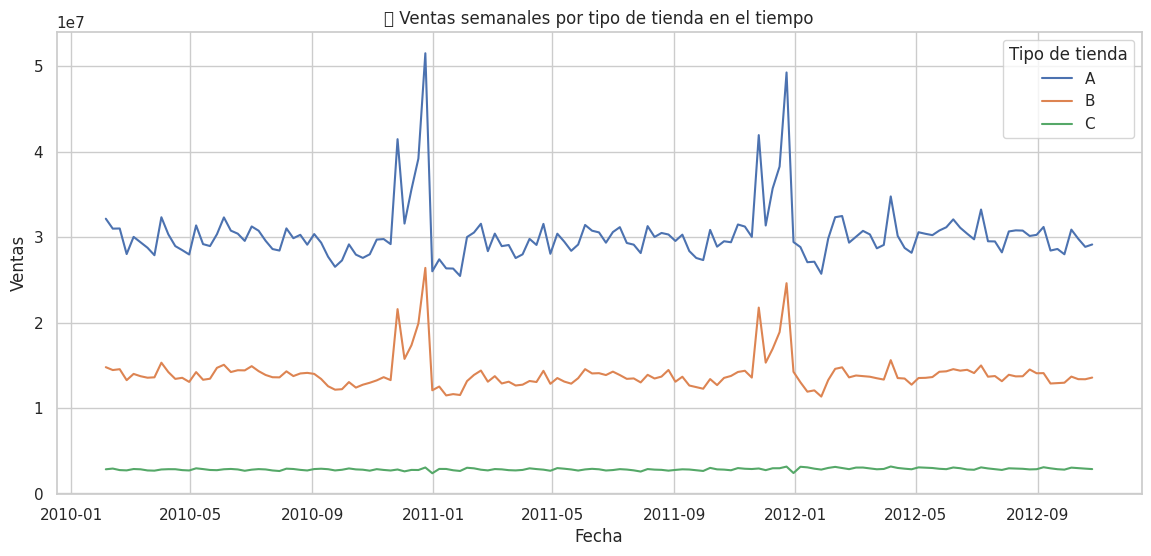

In [16]:
sales_by_type_time = df.groupby(["Date", "Type"])["Weekly_Sales"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_type_time, x="Date", y="Weekly_Sales", hue="Type")
plt.title("📅 Ventas semanales por tipo de tienda en el tiempo")
plt.ylabel("Ventas")
plt.xlabel("Fecha")
plt.legend(title="Tipo de tienda")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


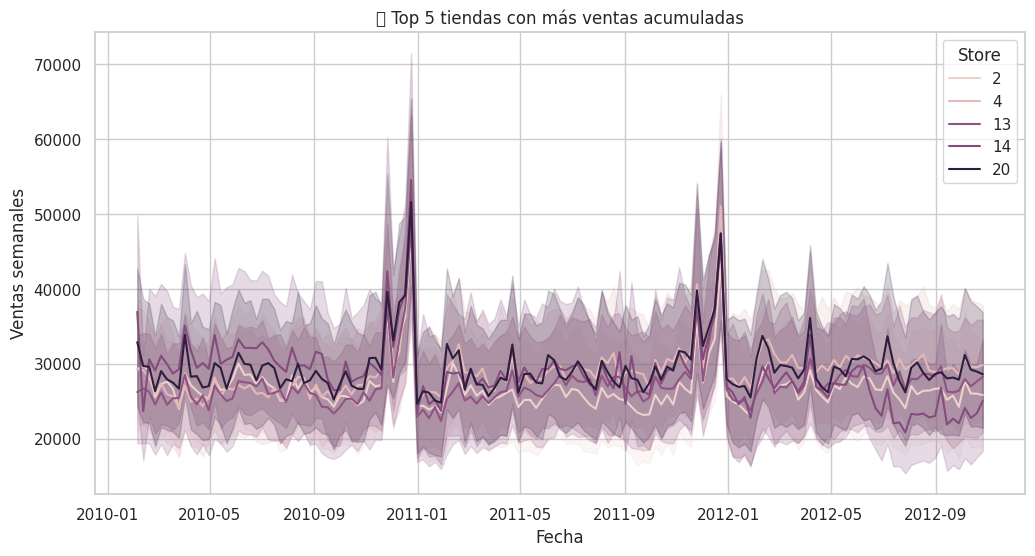

In [17]:
top_stores = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(5).index
top_df = df[df["Store"].isin(top_stores)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x="Date", y="Weekly_Sales", hue="Store")
plt.title("🏆 Top 5 tiendas con más ventas acumuladas")
plt.xlabel("Fecha")
plt.ylabel("Ventas semanales")
plt.show()


In [18]:
df_model = df.copy()

# Convertimos la fecha en una característica temporal útil
df_model["Date"] = pd.to_datetime(df_model["Date"])
df_model["Year"] = df_model["Date"].dt.year
df_model["Month"] = df_model["Date"].dt.month
df_model["Week"] = df_model["Date"].dt.isocalendar().week

# Convertimos la columna IsHoliday a numérica
df_model["IsHoliday"] = df_model["IsHoliday"].astype(int)

# Rellenamos NaNs con 0 en columnas de descuentos
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df_model[markdown_cols] = df_model[markdown_cols].fillna(0)

# Convertimos variables categóricas (Type) a numéricas
df_model = pd.get_dummies(df_model, columns=["Type"], drop_first=True)


In [19]:
# Variables predictoras (features)
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'IsHoliday', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'Year', 'Month', 'Week', 'Type_B', 'Type_C']

X = df_model[features]

# Variable objetivo
y = df_model["Weekly_Sales"]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
import numpy as np

# Evaluación corregida
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.4f}")


✅ RMSE: 21962.37
✅ R²: 0.0750


<ipython-input-23-3015ae79175b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_importance, x="Importance", y="Feature", palette="viridis")
<ipython-input-23-3015ae79175b>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


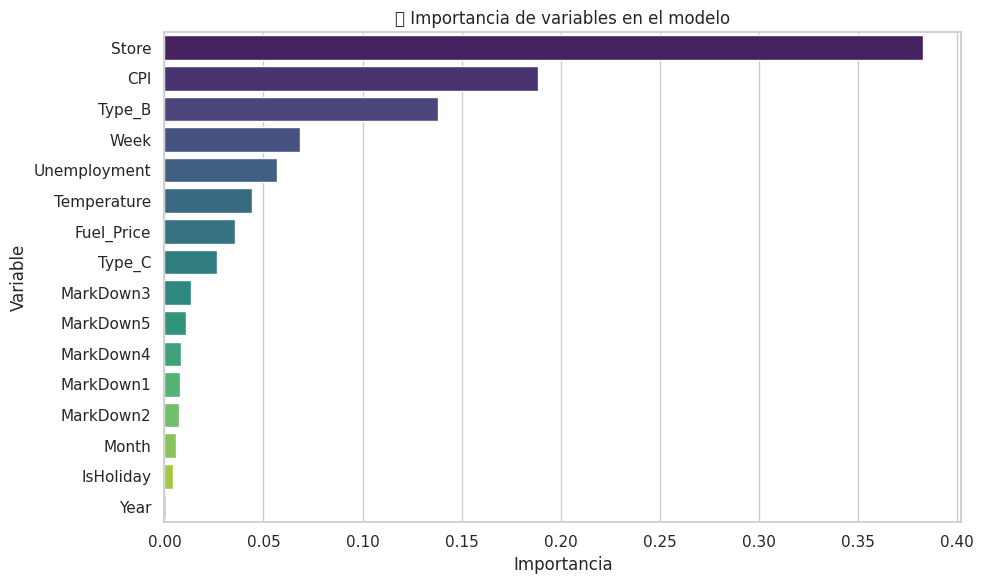

In [23]:
importances = model.feature_importances_
features_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features_importance, x="Importance", y="Feature", palette="viridis")
plt.title("📊 Importancia de variables en el modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
